# CUSTOMER SEGMENTATION ON THE BASIS OF PROFIT:

# Importing Libraries And Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import*
%matplotlib inline

#About Dataset:   
  Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

label= Meaning:
0    = High Profit 
1    = Normal Profit 
2    = No Profit 
3    = Very High Profit 

# Loading Data

In [2]:
cust_df=pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Preprocessing

In [3]:
#As we know that address is acategorical variable K-mean donot process categorical values directly.

In [4]:
df=cust_df.drop("Address",axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
#Normalizing over standard scaler

In [5]:
x=df.values[:,1:] #startinf from age as age is 1
x=np.nan_to_num(x)

cust_dataset=StandardScaler().fit_transform(x)
cust_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Modeling

In [6]:
k_mean=KMeans(init="k-means++",n_clusters=3,n_init=12)
k_mean.fit(cust_dataset)

KMeans(n_clusters=3, n_init=12)

In [7]:
labels=k_mean.labels_
labels[0:5]

array([0, 1, 2, 0, 1])

# Insights

In [8]:
df["cm_lab"]=labels
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cm_lab
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [10]:
#Take Avegafe by labels

In [9]:
df.groupby("cm_lab").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cm_lab,,,,,,,,,
0,425.302412,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,427.434483,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.165217,13.891724
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


# 2D Plotting

C:\Users\AARISH IRFAN\AppData\Local\Temp\ipykernel_8216\105371496.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(cust_dataset[:,0],cust_dataset[:,3],s=area,c=labels.astype(np.float),alpha=0.5)


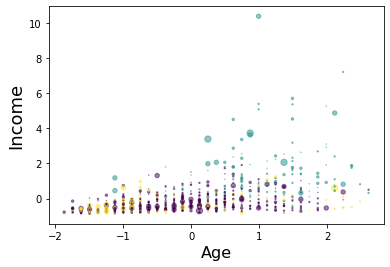

In [11]:
# c is for color values
# s is for the marker size

area=np.pi*(cust_dataset[:,1])**2

plt.scatter(cust_dataset[:,0],cust_dataset[:,3],s=area,c=labels.astype(np.float),alpha=0.5)

plt.xlabel("Age",fontsize=16)
plt.ylabel("Income",fontsize=18)

plt.show()

# 3D Plotting

C:\Users\AARISH IRFAN\AppData\Local\Temp\ipykernel_8216\821346710.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=138)
C:\Users\AARISH IRFAN\AppData\Local\Temp\ipykernel_8216\821346710.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(cust_dataset[:,1],cust_dataset[:,0],cust_dataset[:,3],c=labe

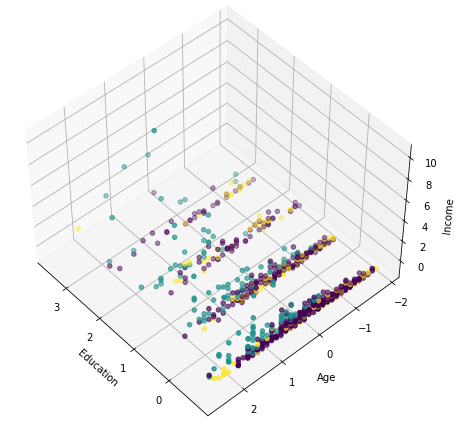

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(6,8))
plt.clf()

ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=138)
plt.cla()

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(cust_dataset[:,1],cust_dataset[:,0],cust_dataset[:,3],c=labels.astype(np.float))

# Prediction

In [13]:
#Age(int)	Edu(int)	Years Employed(int)	Income(int)	Card Debt(float)	Other Debt(float)	Defaulted(float)	DebtIncomeRatio(float)
xi=[[40,2,4,19,4.54,9.308,0.0,10.3]]
#ip=StandardScaler().fit_transform(x1)
ip=StandardScaler().fit_transform(xi)

op=k_mean.predict(ip)

print("This Customer is the part of cluster having label: %.f "%op[0])

This Customer is the part of cluster having label: 0 


# label= Meaning:
0    = High Profit 
1    = Normal Profit 
2    = No Profit 
3    = Very High Profit 